In [1]:
from sklearn import datasets

iris = datasets.load_iris()

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

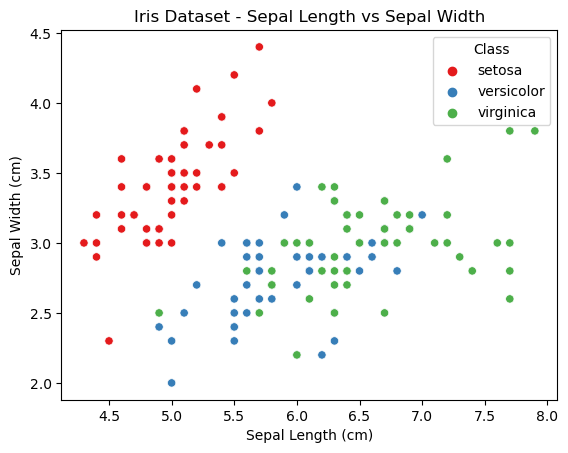

In [3]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target (class) column to the DataFrame
iris_df['class'] = iris.target

# Map target class indices to class names
iris_df['class'] = iris_df['class'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Plot the scatter plot
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='class', data=iris_df, palette='Set1')
plt.title('Iris Dataset - Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Class')
plt.show()

In [4]:
# Count the occurrences of each class label
class_distribution = iris_df['class'].value_counts()

# Calculate the total number of samples
total_samples = iris_df['class'].shape[0]

# Calculate the percentage of each class label
class_distribution_percentage = (class_distribution / total_samples) * 100

print(class_distribution_percentage)

setosa        33.333333
versicolor    33.333333
virginica     33.333333
Name: class, dtype: float64


In [5]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [48]:
import numpy as np

num_indices_to_unlabel = int(0.6*(len(iris_df['class'] )))


In [9]:
from sklearn.cluster import KMeans

# Calculate the target number of data points to keep for each class
target_count_per_class = (class_distribution * 0.4).astype(int)

# Create a DataFrame to store the filtered data
filtered_data = pd.DataFrame(columns=iris_df.columns)

for class_label, target_count in target_count_per_class.items():
    # Filter data points belonging to the current class
    class_data = iris_df[iris_df['class'] == class_label].drop(columns=['class'])
    
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=min(target_count, len(class_data))).fit(class_data)
    
    # Get the cluster centers
    cluster_centers = kmeans.cluster_centers_
    
    # Calculate the Euclidean distance between each data point and cluster centers
    distances = kmeans.transform(class_data)
    
    # Select the data points closest to the cluster centers
    closest_points_indices = distances.argmin(axis=0)
    closest_points = class_data.iloc[closest_points_indices]
    
    # Add the selected data points to the filtered data DataFrame
    closest_points['class'] = class_label
    filtered_data = filtered_data.append(closest_points)

# Display the class distribution of the filtered data
print("Class distribution of the filtered data:")
print(filtered_data['class'].value_counts())

C:\Users\GAURAV SHARMA\AppData\Local\Temp\ipykernel_5772\2712186200.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closest_points['class'] = class_label
C:\Users\GAURAV SHARMA\AppData\Local\Temp\ipykernel_5772\2712186200.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closest_points['class'] = class_label


Class distribution of the filtered data:
setosa        20
virginica     20
versicolor    20
Name: class, dtype: int64


C:\Users\GAURAV SHARMA\AppData\Local\Temp\ipykernel_5772\2712186200.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closest_points['class'] = class_label


In [10]:
filtered_indices = filtered_data.index

print("Indices of the filtered data:")
print(filtered_indices)

Indices of the filtered data:
Int64Index([ 44,  47,  36,   4,  41,  33,  38,  34,  26,   0,  22,   5,  11,
             14,  19,  10,  35,  32,  15,  20,  72,  57,  97,  89,  52,  90,
             77,  56,  68,  96,  63,  82,  62,  84,  75,  80,  70,  60,  59,
             79, 123, 105, 120, 101, 134, 125, 106, 139, 130, 132, 117, 109,
            148, 100, 127, 137, 147, 119, 108, 118],
           dtype='int64')


In [11]:
filtered_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
44,5.1,3.8,1.9,0.4,setosa
47,4.6,3.2,1.4,0.2,setosa
36,5.5,3.5,1.3,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
41,4.5,2.3,1.3,0.3,setosa
33,5.5,4.2,1.4,0.2,setosa
38,4.4,3.0,1.3,0.2,setosa
34,4.9,3.1,1.5,0.2,setosa
26,5.0,3.4,1.6,0.4,setosa
0,5.1,3.5,1.4,0.2,setosa


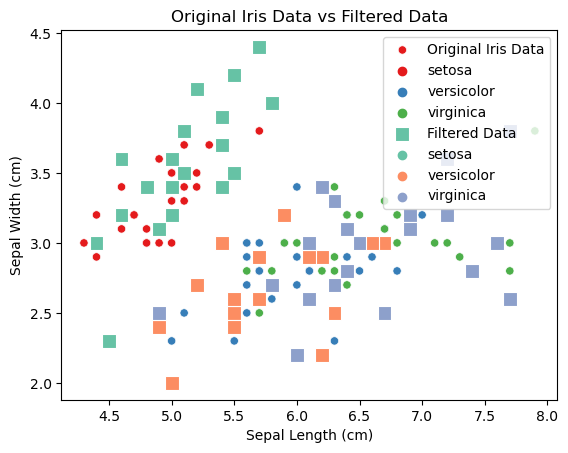

In [12]:
# Plot original Iris data
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='class', data=iris_df, palette='Set1', label='Original Iris Data')

# Plot filtered data
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='class', data=filtered_data, palette='Set2', marker='s', s=100, label='Filtered Data')

plt.title('Original Iris Data vs Filtered Data')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

In [13]:
# We can see that the selected prototypes imitate the data quite well

In [50]:
# Unlabel all data points not in the filtered data

indices_to_unlabel=[]
for index, row in iris_df.iterrows():
    if index not in filtered_indices:
        iris_df.at[index, 'class'] = 'None'
        indices_to_unlabel.append(index)

print("Class distribution after unlabeling:")
print(iris_df['class'].value_counts())

Class distribution after unlabeling:
None          90
setosa        20
versicolor    20
virginica     20
Name: class, dtype: int64


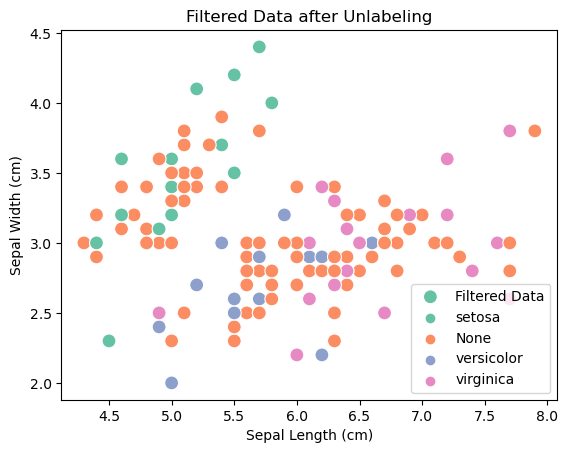

In [15]:
# Plot filtered data
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='class', data=iris_df, palette='Set2', s=100, label='Filtered Data')

plt.title('Filtered Data after Unlabeling')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

In [25]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

y = iris_df[['class']] 
X =iris_df.drop(columns=['class'])

kmeans = KMeans(n_clusters=20)
kmeans.fit(X)
centroids = kmeans.cluster_centers_

# Find indices of closest points to centroids 
distances = cdist(X, centroids, metric ='euclidean')
closest_point_indices = np.argmin(distances, axis=0) 

# Get the centroids of each cluster
v = X.iloc[closest_point_indices,:]

In [26]:
print(v); len(v)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
103                6.3               2.9                5.6               1.8
27                 5.2               3.5                1.5               0.2
97                 6.2               2.9                4.3               1.3
117                7.7               3.8                6.7               2.2
69                 5.6               2.5                3.9               1.1
127                6.1               3.0                4.9               1.8
144                6.7               3.3                5.7               2.5
125                7.2               3.2                6.0               1.8
33                 5.5               4.2                1.4               0.2
42                 4.4               3.2                1.3               0.2
94                 5.6               2.7                4.2               1.3
105                7.6               3.0                6.6     

20

In [27]:
# For kernel parameter "h"

# first we'll find the avg distance between the data points "1/bo"
from scipy.spatial.distance import pdist
distances = pdist(X, 'euclidean')
bo = 1/distances.mean()

print("Average distance between data points (1/bo): ", 1/bo)
print("Reciprocal of Average distance between data points (bo): ", bo, "\n")

Average distance between data points (1/bo):  2.5446414657151366
Reciprocal of Average distance between data points (bo):  0.3929826710259018 



In [28]:
def gaussian_kernel(z1, z2, h):
    
    #kernel parameter
    sigma = h*bo
    
    # Calculate the squared Euclidean distance between z1 and z2
    squared_distance = np.sqrt(np.sum((z1 - z2) ** 2))
    
    # Calculate the Gaussian kernel value
    kernel_value = np.exp(-squared_distance / (2 * sigma ** 2))
    
    return kernel_value

In [29]:
H = np.zeros((len(X), len(v)))

# Loop through each pair of points in x and v to calculate the Gaussian kernel
for i in range(len(X)):
    for j in range(len(v)):
        H[i][j] = gaussian_kernel(X.iloc[i], v.iloc[j], 1)

In [30]:
print(H)

[[2.54061237e-07 6.32632372e-01 1.97917742e-05 ... 1.26795944e-02
  2.03852518e-06 1.21001998e-06]
 [2.39610875e-07 1.47284374e-01 1.85884013e-05 ... 7.06448625e-02
  2.23568304e-06 1.32233513e-06]
 [1.42846693e-07 1.35906146e-01 1.04436612e-05 ... 4.96663910e-02
  1.21468414e-06 8.03598948e-07]
 ...
 [1.98136311e-01 7.79970609e-07 2.16926867e-02 ... 2.07534220e-07
  7.65535021e-02 8.14444367e-02]
 [9.06210736e-02 4.10757122e-07 6.23250258e-03 ... 9.60078575e-08
  1.44984796e-02 4.63535622e-02]
 [1.22676475e-01 2.13894390e-06 3.99003006e-02 ... 7.05563435e-07
  9.26301620e-02 3.41710814e-01]]


In [31]:
H.shape

(150, 20)

In [32]:
# Normalizing H matrix

for i in range(len(X)):
    summ = 0
    for k in range(len(v)):
        summ += H[i][k] 
    for j in range(len(v)):
        H[i][j]=H[i][j]/summ
        
print(H)

[[2.46804639e-07 6.14562875e-01 1.92264736e-05 ... 1.23174347e-02
  1.98030001e-06 1.17545891e-06]
 [2.31648683e-07 1.42390162e-01 1.79707148e-05 ... 6.82973568e-02
  2.16139202e-06 1.27839436e-06]
 [1.48955089e-07 1.41717751e-01 1.08902519e-05 ... 5.17902202e-02
  1.26662634e-06 8.37962364e-07]
 ...
 [1.82741682e-01 7.19369108e-07 2.00072266e-02 ... 1.91409401e-07
  7.06055125e-02 7.51164353e-02]
 [1.69501940e-01 7.68299540e-07 1.16575675e-02 ... 1.79577636e-07
  2.71186417e-02 8.67018942e-02]
 [1.06562051e-01 1.85797845e-06 3.46591133e-02 ... 6.12882676e-07
  8.04625335e-02 2.96824676e-01]]


In [33]:
v.index

Int64Index([103,  27,  97, 117,  69, 127, 144, 125,  33,  42,  94, 105,  86,
            145,  93, 109,  34,  41,  72, 101],
           dtype='int64')

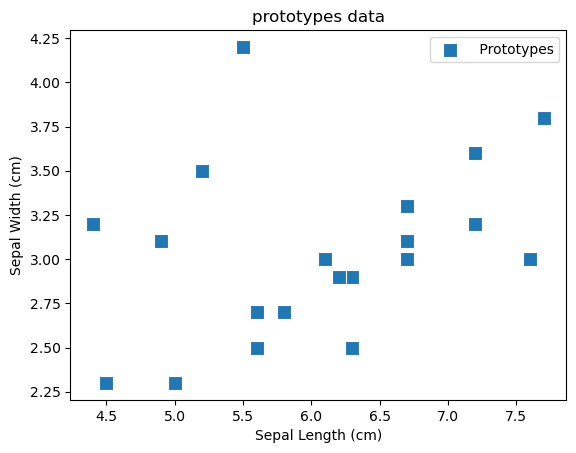

In [34]:
# Plot prototypes data
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', data=v, palette='Set2', marker='s', s=100, label=' Prototypes')

plt.title('prototypes data')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

In [40]:
# To find Kernel Matrix

u = X.sample(n=20); u

W = np.zeros((len(u), len(u)))
# Loop through each pair of points in u to calculate the Gaussian kernel
for i in range(len(u)):
    for j in range(len(u)):
        W[i][j] = gaussian_kernel(u.iloc[i], u.iloc[j], 1)
        
E = np.zeros((len(X), len(u)))
# Loop through each pair of points in u to calculate the Gaussian kernel
for i in range(len(X)):
    for j in range(len(u)):
        E[i][j] = gaussian_kernel(X.iloc[i], u.iloc[j], 1)   

In [41]:
print(E); E.shape

[[1.32406226e-01 1.35906146e-01 3.70743205e-08 ... 3.02212913e-07
  7.28947720e-10 7.98859048e-08]
 [2.42407709e-02 2.92520759e-02 3.11623632e-08 ... 2.44608370e-07
  6.55080482e-10 8.17007828e-08]
 [3.30074047e-02 2.96903288e-02 2.01858833e-08 ... 1.42846693e-07
  3.58235616e-10 4.50151446e-08]
 ...
 [4.79173716e-07 1.70481386e-06 3.80134280e-02 ... 1.85944626e-01
  9.79207707e-04 6.79248983e-02]
 [2.98023842e-07 1.00725777e-06 1.22676475e-01 ... 7.06448625e-02
  6.48955052e-04 1.97346067e-02]
 [1.28701179e-06 4.27649632e-06 1.77604783e-02 ... 2.64051267e-02
  2.03811541e-04 2.22966475e-02]]


(150, 20)

In [42]:
print(W); W.shape

[[1.00000000e+00 2.26807248e-01 3.78783437e-08 4.73652720e-06
  6.74967110e-07 1.45268256e-04 5.23574831e-05 1.70481386e-06
  4.62242587e-07 2.42407709e-02 2.73206051e-07 3.65923963e-06
  1.39562520e-07 9.17082277e-03 1.80076578e-03 1.08653996e-01
  2.39457727e-06 2.82857998e-07 6.81605328e-10 6.37181686e-08]
 [2.26807248e-01 1.00000000e+00 1.26370201e-07 1.61818467e-05
  2.46350355e-06 5.18181742e-04 1.72825625e-04 6.03199918e-06
  1.63894856e-06 2.92520759e-02 9.23308097e-07 1.32163949e-05
  4.96769289e-07 8.86963372e-03 2.26199474e-03 1.11264256e-01
  8.32905691e-06 1.05829849e-06 2.36969120e-09 2.19929340e-07]
 [3.78783437e-08 1.26370201e-07 1.00000000e+00 5.98143229e-03
  1.02686680e-02 1.14944650e-04 9.14884079e-05 3.19499378e-03
  2.42407709e-02 3.11623632e-08 4.88094015e-02 2.91855521e-03
  6.05767617e-02 1.86397673e-08 1.41216958e-08 2.62384575e-08
  2.55465115e-03 2.67894548e-02 2.79089584e-03 2.39022526e-02]
 [4.73652720e-06 1.61818467e-05 5.98143229e-03 1.00000000e+00
  5.3

(20, 20)

In [44]:
np.linalg.inv(W)

array([[ 1.06245802e+00, -2.30468925e-01, -2.65284937e-09,
        -6.19137787e-07,  6.97722685e-08, -2.07006989e-05,
        -6.66988415e-06, -2.05285977e-08, -1.03942929e-09,
        -1.71440455e-02,  4.40165099e-09, -1.30471727e-08,
         6.80789427e-09, -4.19986052e-03,  4.61708341e-04,
        -8.95753668e-02, -2.26165010e-07,  1.96388909e-08,
         8.07412466e-12,  8.03593483e-10],
       [-2.30468925e-01,  1.06333773e+00, -1.32858877e-08,
        -8.74887069e-06,  9.17060110e-07, -4.88638459e-04,
        -9.05874025e-05, -4.98049532e-07, -4.29507198e-08,
        -2.39162535e-02,  3.55904931e-07, -3.83016485e-06,
         1.37697419e-07, -2.46252357e-03,  1.15107775e-04,
        -9.29701547e-02, -5.10646221e-06, -7.10212542e-08,
         3.07682122e-10,  5.36970512e-08],
       [-2.65284937e-09, -1.32858877e-08,  1.00570569e+00,
        -1.98287263e-03, -1.68497759e-03,  7.72327282e-06,
         1.47677877e-05,  1.55055281e-03, -2.13171917e-02,
         2.10029493e-10, -3.3

In [45]:
# Kernel Materix

K = np.matmul(E, np.matmul(np.linalg.inv(W),np.transpose(E)))
K

array([[5.92776661e-02, 1.74906977e-01, 7.36825044e-02, ...,
        5.83189969e-07, 2.95782983e-07, 1.67810018e-06],
       [1.74906977e-01, 1.00000000e+00, 3.78598111e-01, ...,
        4.72323055e-07, 2.32317570e-07, 1.44592240e-06],
       [7.36825044e-02, 3.78598111e-01, 1.74485502e-01, ...,
        2.82053114e-07, 1.47327720e-07, 9.08342620e-07],
       ...,
       [5.83189969e-07, 4.72323055e-07, 2.82053114e-07, ...,
        1.63038994e-01, 5.63967771e-02, 5.90051937e-02],
       [2.95782983e-07, 2.32317570e-07, 1.47327720e-07, ...,
        5.63967771e-02, 3.54418983e-02, 2.53599140e-02],
       [1.67810018e-06, 1.44592240e-06, 9.08342620e-07, ...,
        5.90051937e-02, 2.53599140e-02, 4.60917419e-02]])

In [46]:
I = np.ones(len(X))

D=np.diag(np.matmul(K,I))
D

array([[ 3.3133307 ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , 10.78733346,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  5.08019002, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  5.37326464,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         2.12834355,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  2.77587032]])

In [51]:
#Finding fv* using L2 Loss Approach

X_u = X.iloc[indices_to_unlabel]
X_l = X.drop(index=indices_to_unlabel)

H_l = np.zeros((len(X_l), len(v)))
H_u = np.zeros((len(X_u), len(v)))

for i in range(len(X_l)):
    for j in range(len(v)):
        H_l[i][j] = gaussian_kernel(X_l.iloc[i], v.iloc[j], 1)
        
for i in range(len(X_u)):
    for j in range(len(v)):
        H_u[i][j] = gaussian_kernel(X_u.iloc[i], v.iloc[j], 1)

In [52]:
H_u

array([[2.39610875e-07, 1.47284374e-01, 1.85884013e-05, ...,
        7.06448625e-02, 2.23568304e-06, 1.32233513e-06],
       [1.42846693e-07, 1.35906146e-01, 1.04436612e-05, ...,
        4.96663910e-02, 1.21468414e-06, 8.03598948e-07],
       [2.29152362e-07, 9.68427616e-02, 1.58774955e-05, ...,
        6.66186586e-02, 1.94316251e-06, 1.33779114e-06],
       ...,
       [8.49508205e-02, 4.15174175e-07, 9.48450962e-03, ...,
        1.08297971e-07, 3.15301529e-02, 3.51194708e-02],
       [9.47031093e-02, 1.39072842e-06, 3.80134280e-02, ...,
        6.11195928e-07, 2.63185357e-01, 1.69770695e-01],
       [1.22676475e-01, 2.13894390e-06, 3.99003006e-02, ...,
        7.05563435e-07, 9.26301620e-02, 3.41710814e-01]])

In [53]:
H_l

array([[2.54061237e-07, 6.32632372e-01, 1.97917742e-05, ...,
        1.26795944e-02, 2.03852518e-06, 1.21001998e-06],
       [2.22958949e-07, 4.52464115e-01, 1.66503701e-05, ...,
        1.07522512e-02, 1.69810101e-06, 1.07046677e-06],
       [7.48689036e-07, 1.80292105e-01, 5.40574668e-05, ...,
        2.26199474e-03, 4.98637859e-06, 3.02262579e-06],
       ...,
       [9.47031093e-02, 2.65737404e-07, 6.77357573e-03, ...,
        5.86994219e-08, 2.39022526e-02, 1.89635965e-02],
       [1.98136311e-01, 7.79970609e-07, 2.16926867e-02, ...,
        2.07534220e-07, 7.65535021e-02, 8.14444367e-02],
       [9.06210736e-02, 4.10757122e-07, 6.23250258e-03, ...,
        9.60078575e-08, 1.44984796e-02, 4.63535622e-02]])

In [89]:
c1 = 2
c2 = 0

In [90]:
a = np.matmul(np.transpose(H),np.matmul(D-K,H))+ c1* np.matmul(np.transpose(H_l),H_l) + c2* np.matmul(np.transpose(H_u),H_u)

In [91]:
E_l = np.zeros((len(X_l), len(u)))
# Loop through each pair of points in u to calculate the Gaussian kernel
for i in range(len(X_l)):
    for j in range(len(u)):
        E_l[i][j] = gaussian_kernel(X_l.iloc[i], u.iloc[j], 1)

In [92]:
E_l

array([[1.32406226e-01, 1.35906146e-01, 3.70743205e-08, ...,
        3.02212913e-07, 7.28947720e-10, 7.98859048e-08],
       [1.64866464e-01, 1.35906146e-01, 3.38276233e-08, ...,
        2.57594536e-07, 6.09722756e-10, 6.72442520e-08],
       [2.26807248e-01, 1.00000000e+00, 1.26370201e-07, ...,
        1.05829849e-06, 2.36969120e-09, 2.19929340e-07],
       ...,
       [1.74611506e-07, 6.24788219e-07, 4.48067304e-02, ...,
        3.11195697e-01, 3.10895689e-03, 7.35171443e-02],
       [4.79173716e-07, 1.70481386e-06, 3.80134280e-02, ...,
        1.85944626e-01, 9.79207707e-04, 6.79248983e-02],
       [2.98023842e-07, 1.00725777e-06, 1.22676475e-01, ...,
        7.06448625e-02, 6.48955052e-04, 1.97346067e-02]])

In [93]:
y_encoded = pd.get_dummies(iris_df['class'], prefix='class')
y_encoded

,class_None,class_setosa,class_versicolor,class_virginica
0,0,1,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,1,0,0
...,...,...,...,...
145,1,0,0,0
146,1,0,0,0
147,0,0,0,1
148,0,0,0,1


In [94]:
y_l=y_encoded.iloc[filtered_indices]
print(y_l.shape)

(60, 4)


In [95]:
y_l

,class_None,class_setosa,class_versicolor,class_virginica
44,0,1,0,0
47,0,1,0,0
36,0,1,0,0
4,0,1,0,0
41,0,1,0,0
33,0,1,0,0
38,0,1,0,0
34,0,1,0,0
26,0,1,0,0
0,0,1,0,0


In [96]:
# Transpose E_l to have dimensions (15 x 45)
E_l_transposed = np.transpose(E_l)
E_l_transposed.shape


(20, 60)

In [97]:
# Perform matrix multiplication
E_l_transposed = np.array(E_l_transposed)
y_l = np.array(y_l)
result_intermediate = np.matmul(E_l_transposed, y_l)
result_intermediate.shape

(20, 4)

In [98]:
# Assuming 'a' is already defined elsewhere
f_v_new = np.matmul(np.linalg.inv(a), result_intermediate)
f_v_new

array([[ 0.        ,  0.79625886,  0.00726162,  0.06867591],
       [ 0.        ,  0.51059218,  0.0072545 ,  0.02880237],
       [ 0.        ,  0.11518901, -0.02320696,  0.13273638],
       [ 0.        , -0.12007101,  0.99496862,  0.31505055],
       [ 0.        , -0.01211825,  0.23913385,  0.20947013],
       [ 0.        , -0.08569481,  0.38825841, -0.246917  ],
       [ 0.        , -0.39361669,  1.18388089,  0.19160248],
       [ 0.        , -0.11650255,  0.21080913,  0.15780485],
       [ 0.        ,  0.09766679,  0.07677127,  0.1248924 ],
       [ 0.        ,  0.7115391 , -0.01107187, -0.00728452],
       [ 0.        ,  0.11897383,  0.10544762,  0.52842737],
       [ 0.        , -0.01617403,  0.62032603,  0.23546586],
       [ 0.        ,  0.04960809,  0.1663371 ,  0.51941293],
       [ 0.        ,  0.47155344, -0.22523425,  0.09599218],
       [ 0.        ,  0.53817682,  0.02551588,  0.09753995],
       [ 0.        ,  1.12856715, -0.53423094, -0.09450999],
       [ 0.        , -0.

In [99]:
f_u=np.matmul(H_u,f_v_new)
f_u

array([[ 0.        ,  0.1728186 ,  0.10237268,  0.07070222],
       [ 0.        ,  0.32571664,  0.05995999,  0.04539399],
       [ 0.        ,  0.30557145,  0.06113139,  0.04992099],
       [ 0.        ,  0.31619014,  0.03664774,  0.02877397],
       [ 0.        ,  0.32121803,  0.06146846,  0.0485105 ],
       [ 0.        ,  0.27029907,  0.03656844,  0.05898475],
       [ 0.        ,  0.18867055,  0.11409253,  0.06977867],
       [ 0.        ,  0.19795012,  0.08581919,  0.06462358],
       [ 0.        ,  0.26706114,  0.01913163,  0.03414902],
       [ 0.        ,  0.13136252,  0.02947104,  0.04430085],
       [ 0.        ,  0.34797107,  0.0428895 ,  0.0434468 ],
       [ 0.        ,  0.08896121,  0.01858839,  0.0276038 ],
       [ 0.        ,  0.23772235,  0.02891104,  0.03438242],
       [ 0.        ,  0.16740323,  0.03945103,  0.03180706],
       [ 0.        ,  0.13811851,  0.03228824,  0.02463734],
       [ 0.        ,  0.14009636,  0.09206143,  0.06106784],
       [ 0.        ,  0.

In [100]:
f_u.shape

(90, 4)

In [105]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalized_f_u = scaler.fit_transform(f_u)

print("Normalized f_u vector:")
print(normalized_f_u)

Normalized f_u vector:
[[ 0.00000000e+00  5.46951558e-02 -1.18537778e-01 -6.11088674e-01]
 [ 0.00000000e+00  1.03460654e+00 -4.25721583e-01 -8.30054775e-01]
 [ 0.00000000e+00  9.05497648e-01 -4.17237429e-01 -7.90887294e-01]
 [ 0.00000000e+00  9.73551943e-01 -5.94565956e-01 -9.73850734e-01]
 [ 0.00000000e+00  1.00577533e+00 -4.14796120e-01 -8.03090840e-01]
 [ 0.00000000e+00  6.79439726e-01 -5.95140308e-01 -7.12467955e-01]
 [ 0.00000000e+00  1.56289037e-01 -3.36540311e-02 -6.19079249e-01]
 [ 0.00000000e+00  2.15761063e-01 -2.38430318e-01 -6.63680907e-01]
 [ 0.00000000e+00  6.58688129e-01 -7.21430517e-01 -9.27346022e-01]
 [ 0.00000000e+00 -2.10993518e-01 -6.46544888e-01 -8.39512659e-01]
 [ 0.00000000e+00  1.17723342e+00 -5.49358594e-01 -8.46901857e-01]
 [ 0.00000000e+00 -4.82740129e-01 -7.25365059e-01 -9.83975072e-01]
 [ 0.00000000e+00  4.70658161e-01 -6.50600806e-01 -9.25326621e-01]
 [ 0.00000000e+00  1.99884697e-02 -5.74262473e-01 -9.47608582e-01]
 [ 0.00000000e+00 -1.67694924e-01 -6.26

In [106]:
y_pred = np.zeros_like(normalized_f_u)

# Encode negative entries as 0 and positive entries as 1 in y_pred
y_pred[normalized_f_u >= 0.1] = 1

print("y_pred vector:")
print(y_pred)

y_pred vector:
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0.

In [107]:
y_pred.shape

(90, 4)

In [108]:
y_u=y_encoded.drop(filtered_indices)
y_u

,class_None,class_setosa,class_versicolor,class_virginica
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
6,1,0,0,0
7,1,0,0,0
...,...,...,...,...
143,1,0,0,0
144,1,0,0,0
145,1,0,0,0
146,1,0,0,0


In [109]:
from sklearn.metrics import multilabel_confusion_matrix

# Assuming 'y_u' and 'y_pred' are your multi-label indicators

# Compute the confusion matrix
conf_matrix = multilabel_confusion_matrix(y_u, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[[ 0  0]
  [90  0]]

 [[57 33]
  [ 0  0]]

 [[69 21]
  [ 0  0]]

 [[57 33]
  [ 0  0]]]
